# Class Single Recording Code

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [2]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n7-240821-114717"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs\n7-240821-114717.csv"

# single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n5-240821-085040"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs\n5-240821-085040.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data, single_recording_path)

# tdt2 = tdt.read_block(single_recording_path2)
# tdt_data_2 = TDTData(tdt2, single_recording_path2)

# tdt_data_obj.extract_manual_annotation_behaviors(csv_base_path)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac\n7-240821-114717\Notes.txt
read from t=0s to t=1309.86s


## Plot Raw Trace

In [4]:
len(tdt_data_obj.streams['DA'])

1332352

In [5]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t = 30)
len(tdt_data_obj.streams['DA'])

1301834

In [6]:
tdt_data_obj.remove_final_data_segment(t = 30)
len(tdt_data_obj.streams['DA'])

1271316

In [7]:
tdt_data_obj.remove_time_segment(90,130)

Removed time segment from 90s to 130s.


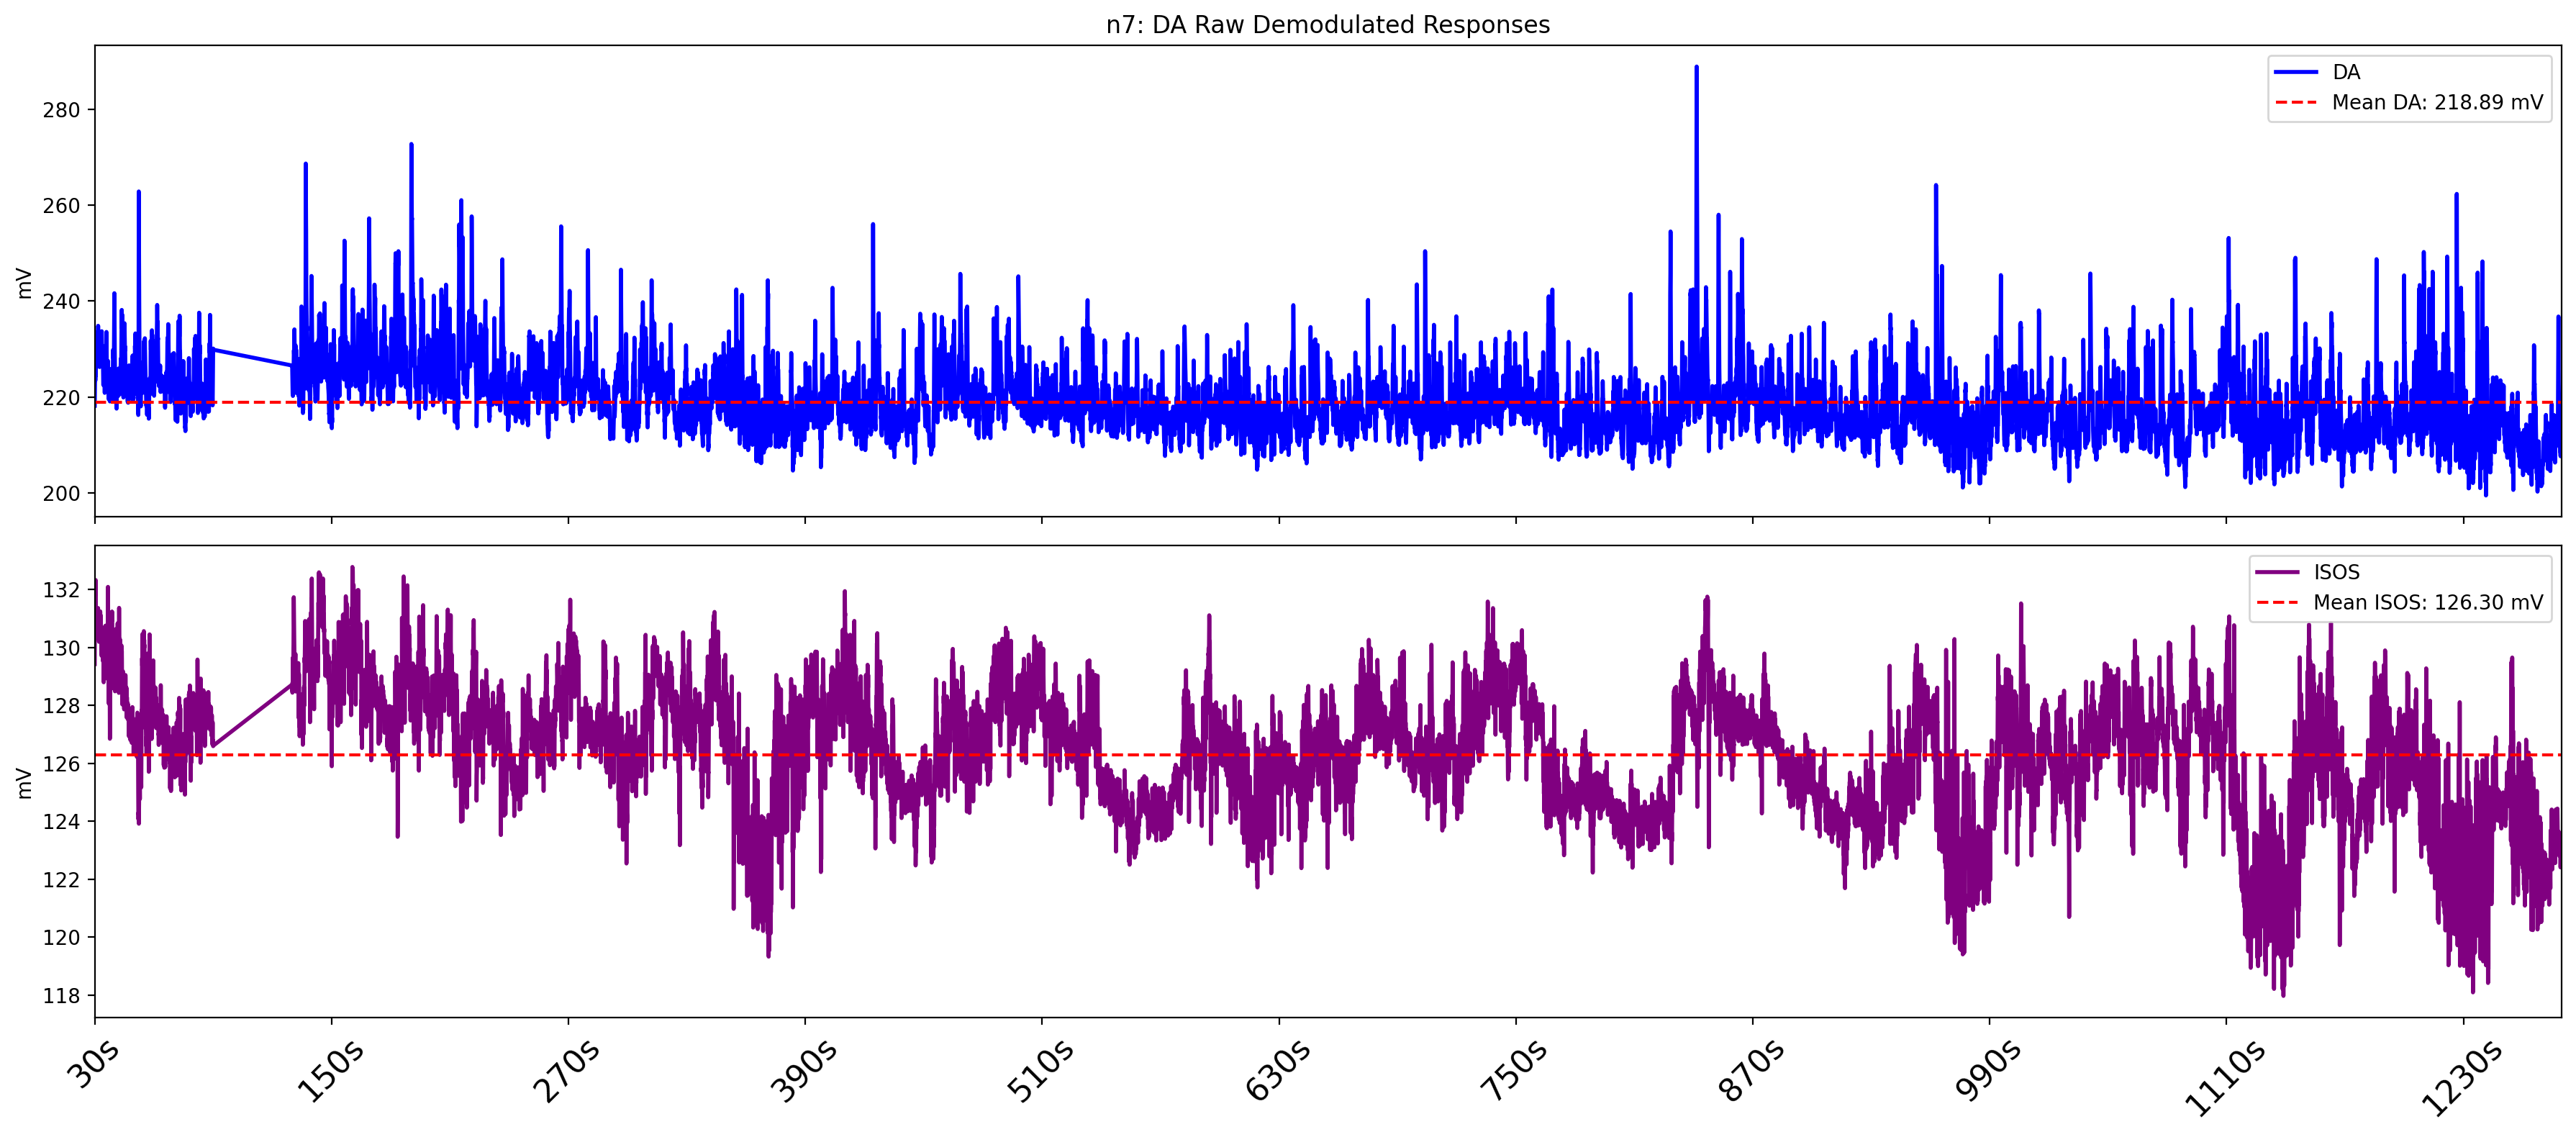

In [8]:
# Plot raw trace
tdt_data_obj.plot_signal('raw')

In [9]:
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*2)

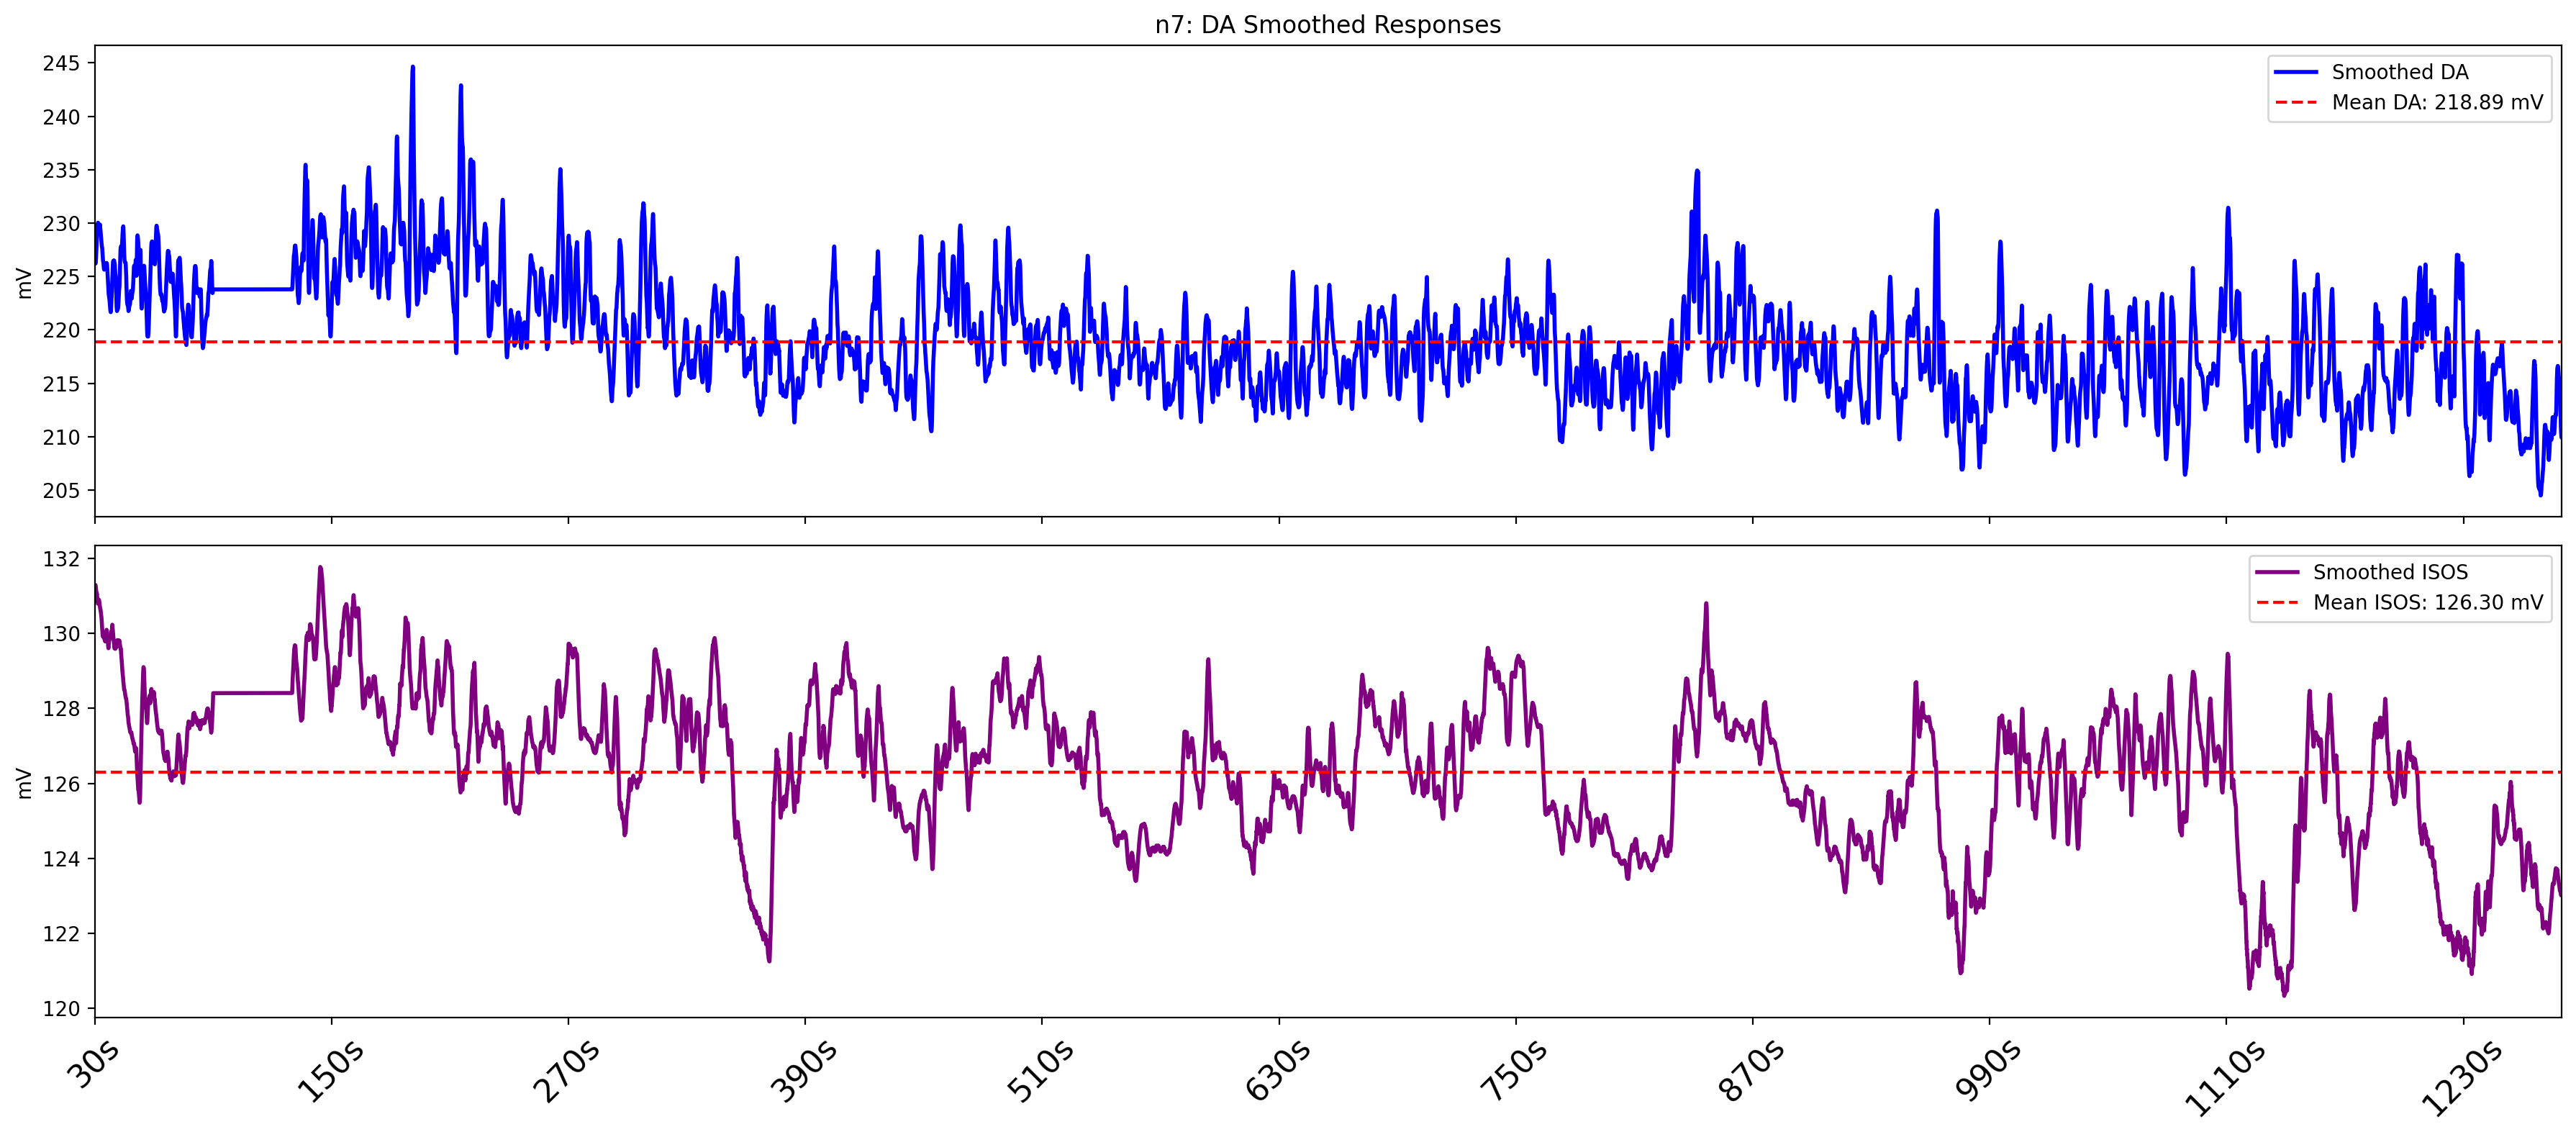

In [10]:
tdt_data_obj.plot_signal('smoothed')

In [11]:
# tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.apply_ma_baseline_correction()

In [12]:
tdt_data_obj.DA_fc

array([224.37735983, 224.37731465, 224.37726947, ..., 213.56122404,
       213.56110413, 213.5609842 ])

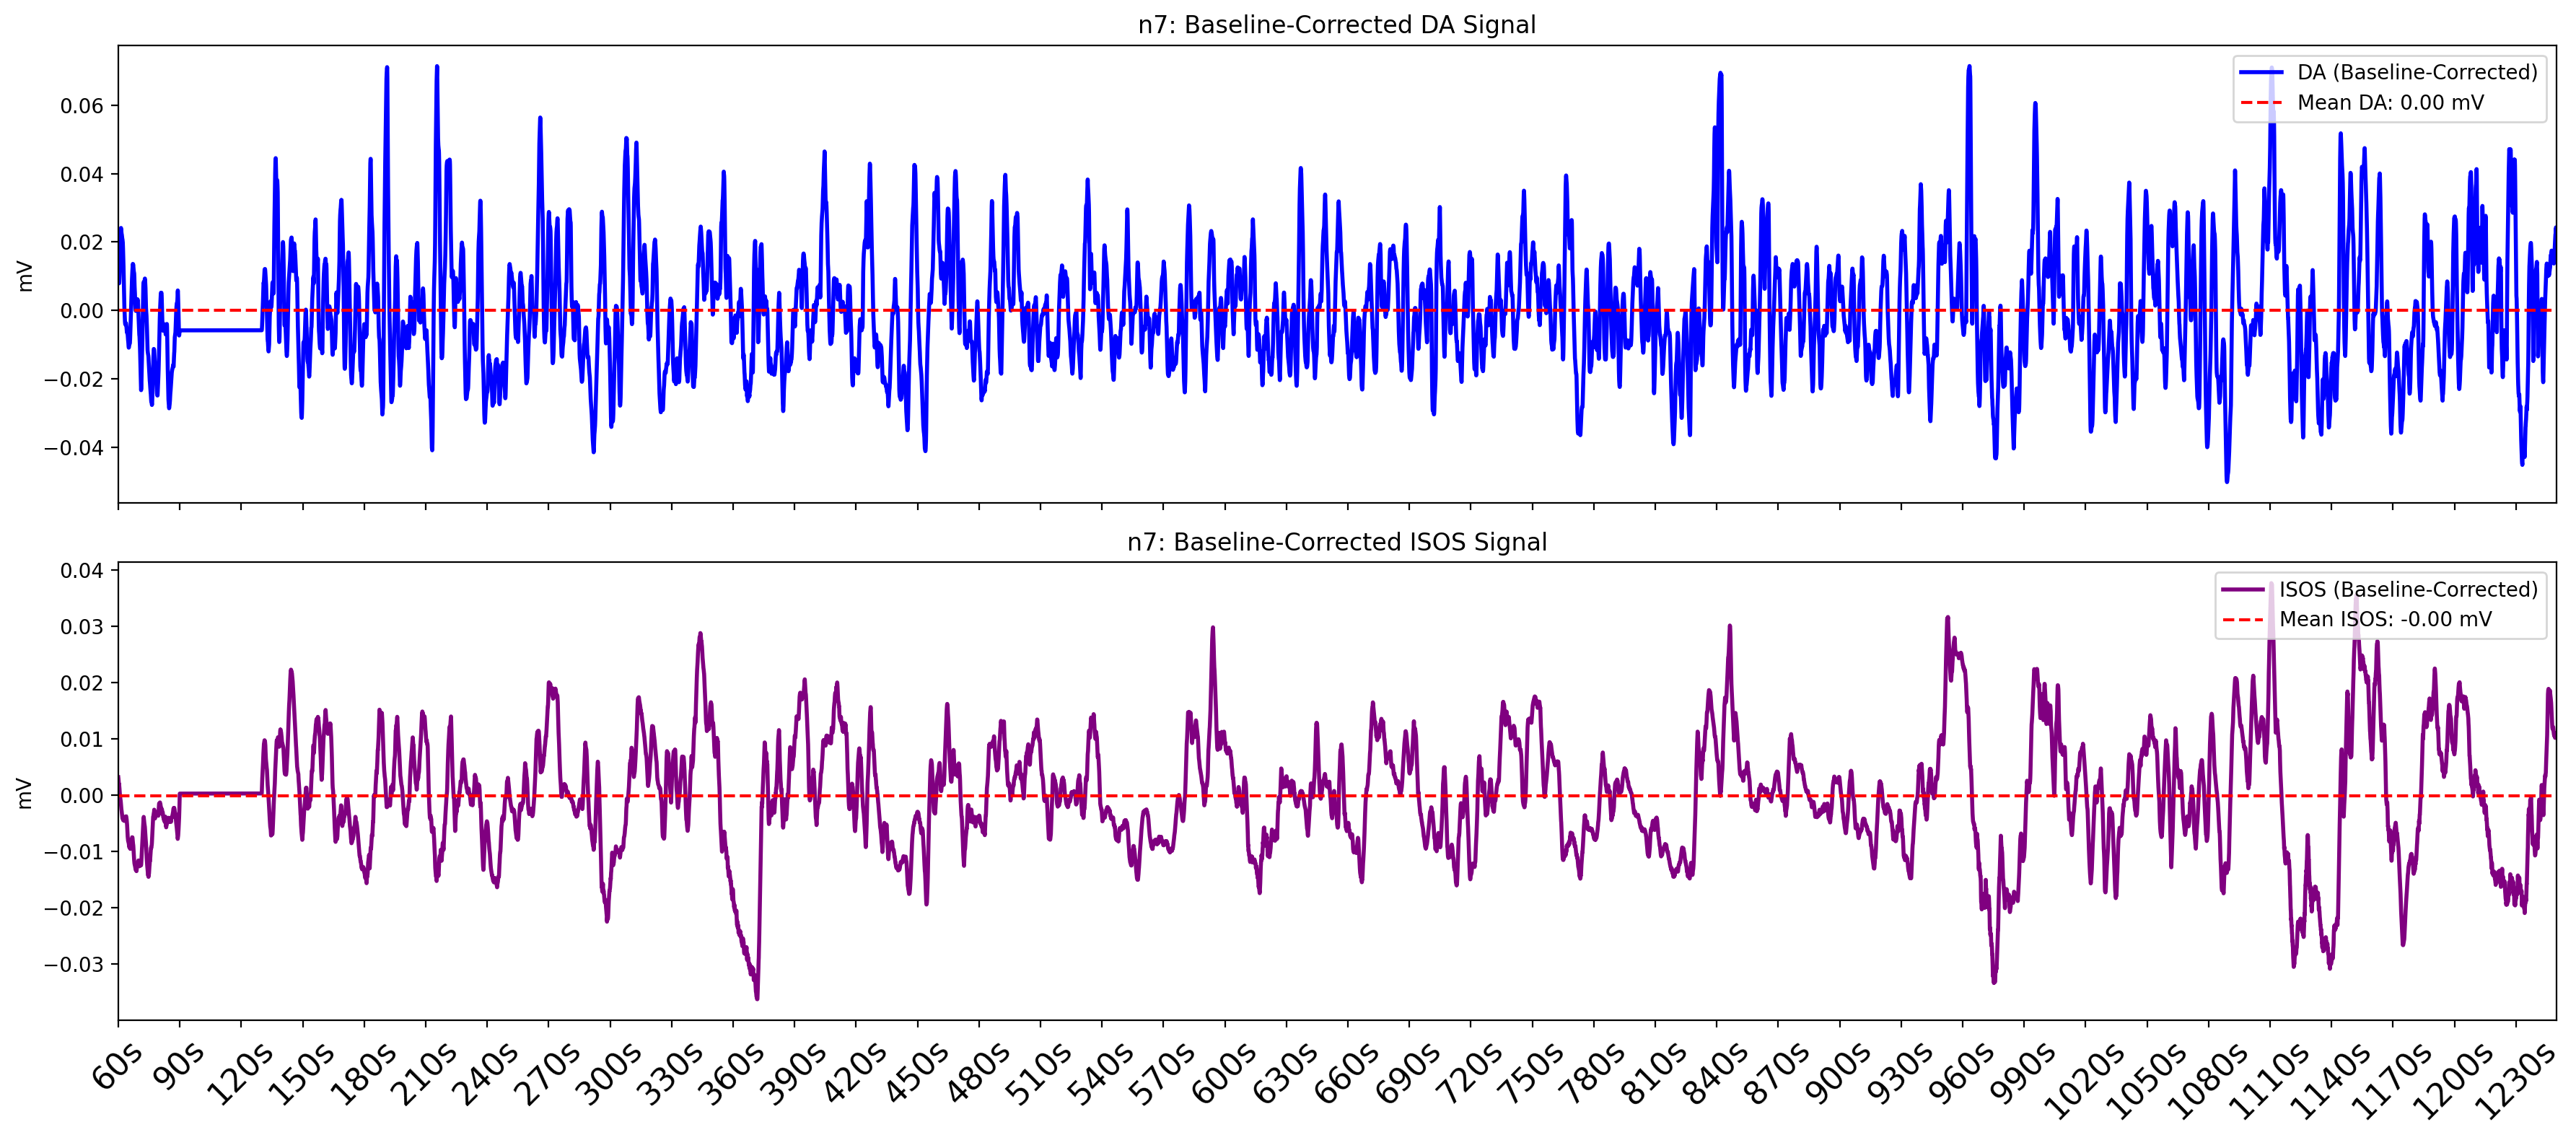

In [13]:
tdt_data_obj.plot_baseline_corrected_signal()

In [14]:
tdt_data_obj.perform_standardization()

In [15]:
tdt_data_obj.align_channels()

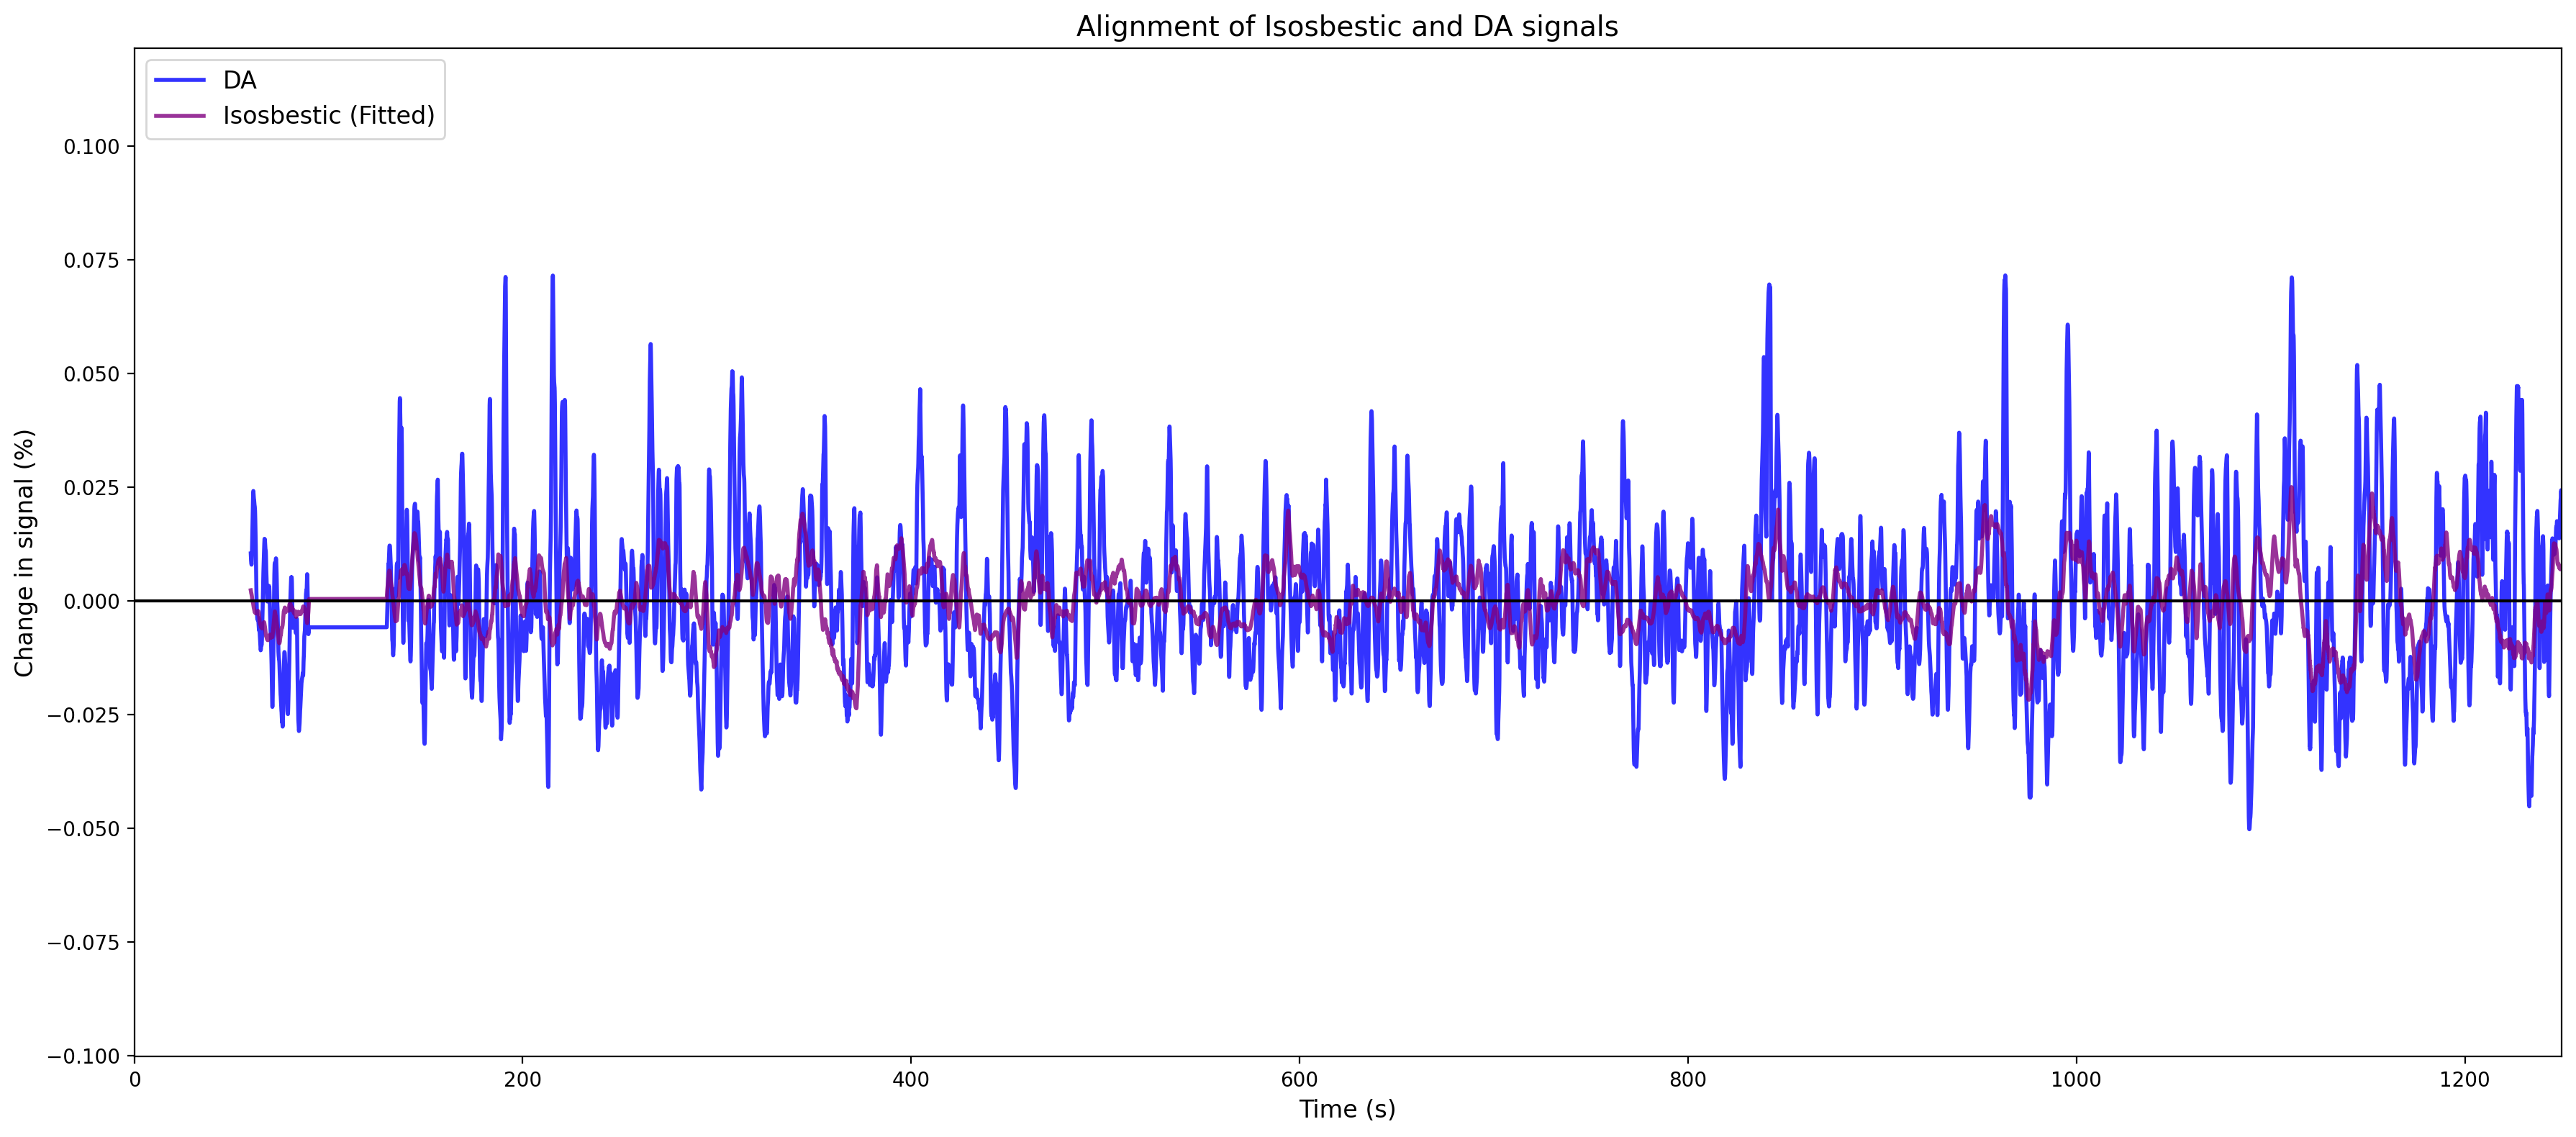

In [16]:
tdt_data_obj.plot_aligned_signals()

In [17]:
tdt_data_obj.compute_dFF()

array([0.00808673, 0.00807393, 0.00806122, ..., 0.01381655, 0.01379227,
       0.01376797])

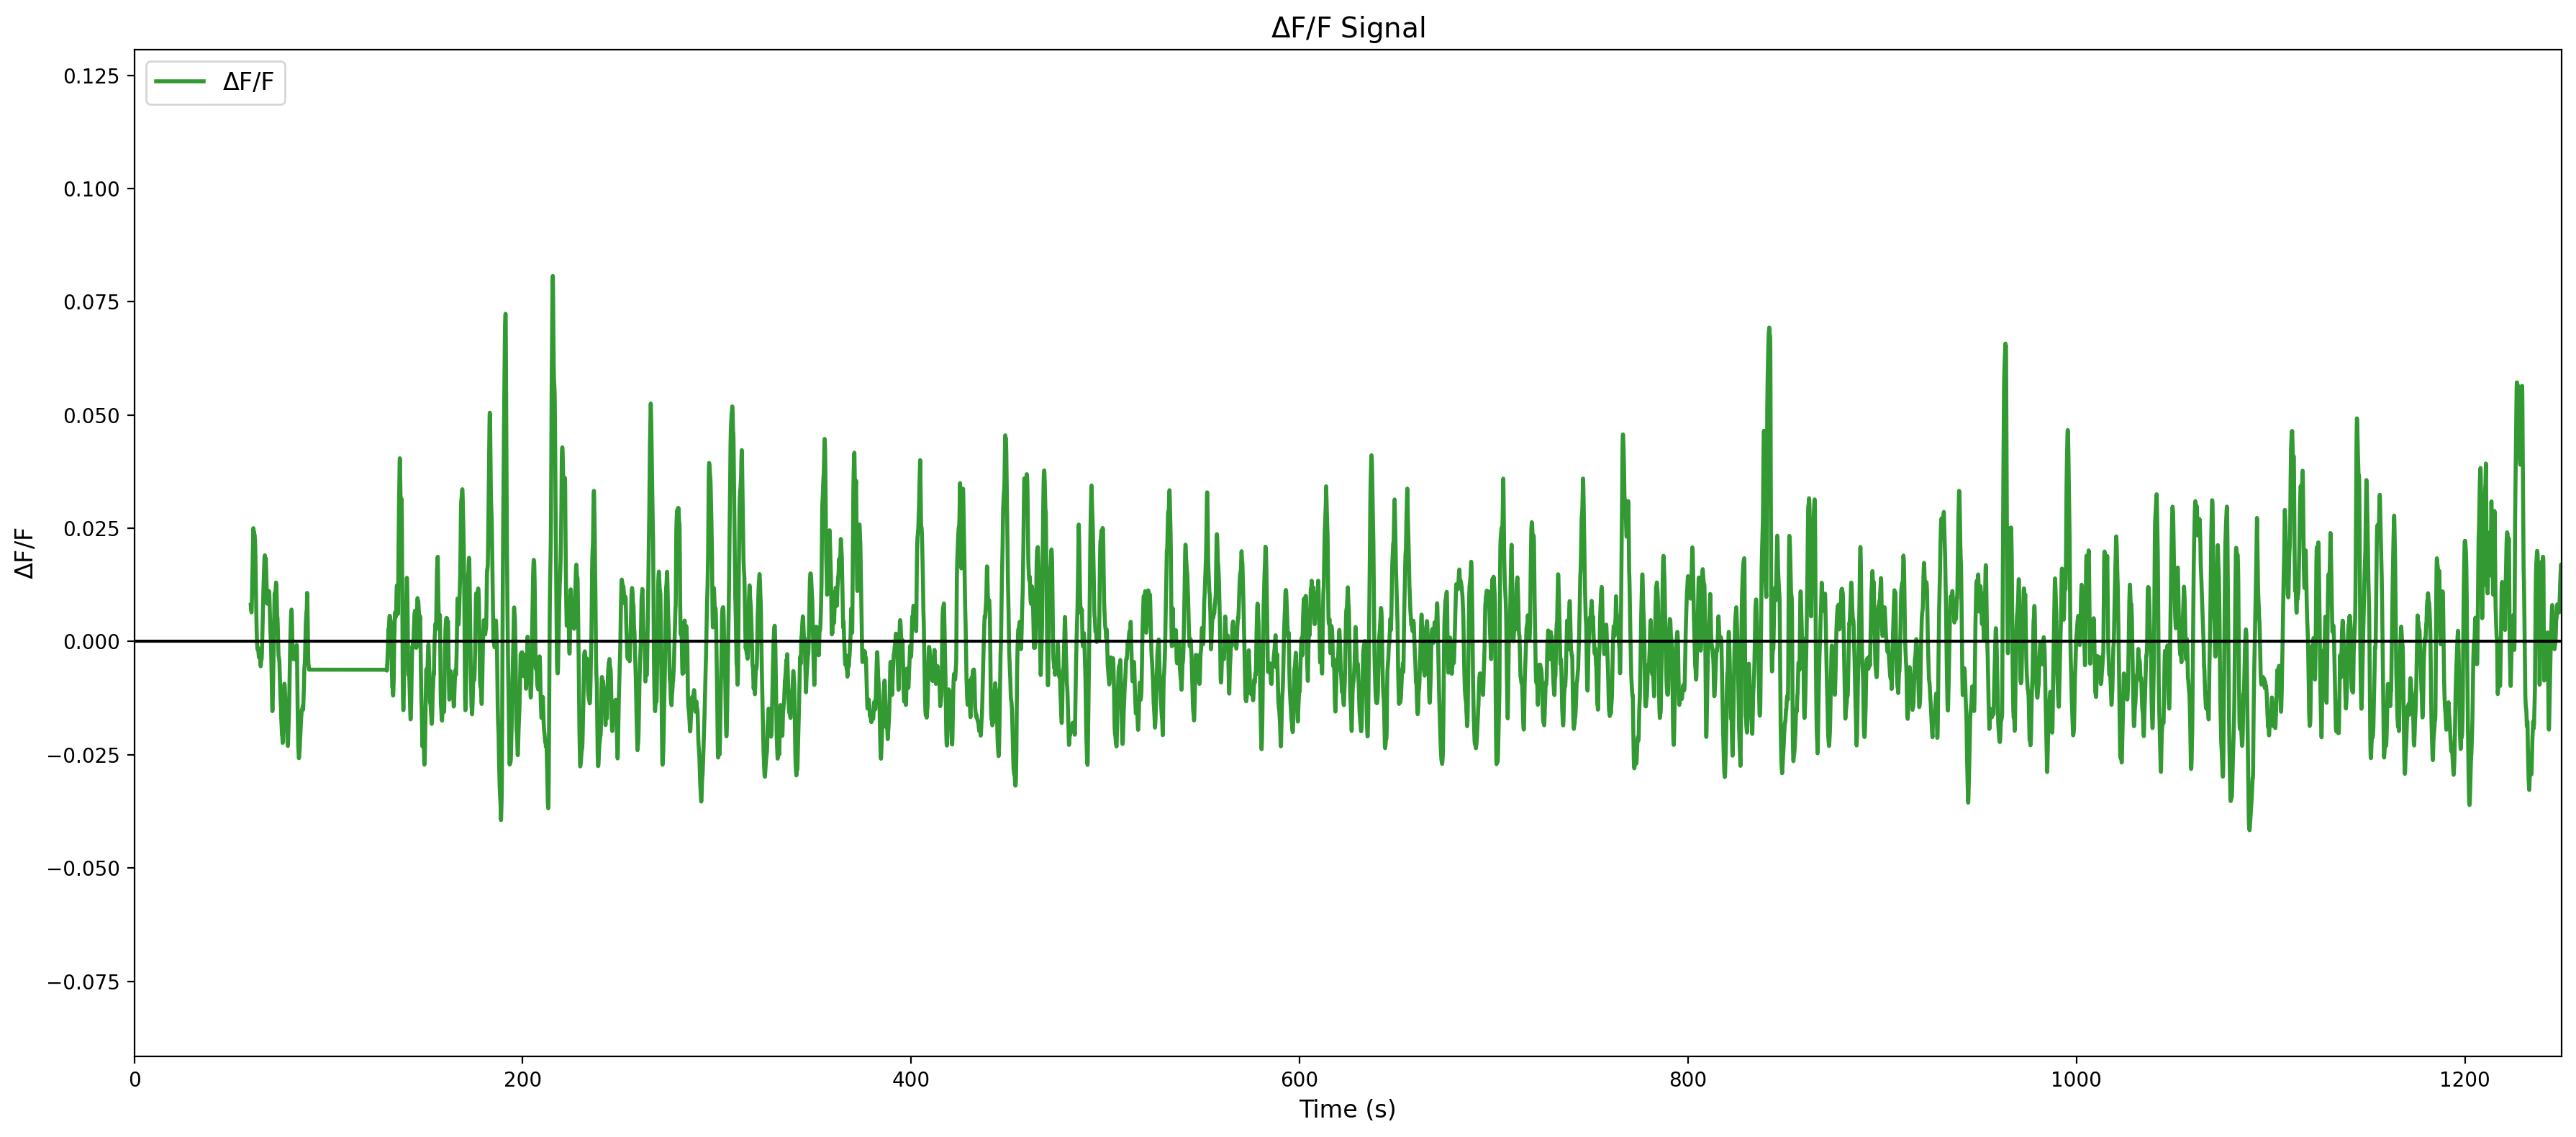

In [18]:
tdt_data_obj.plot_dFF()

In [19]:
tdt_data_obj.compute_zscore()

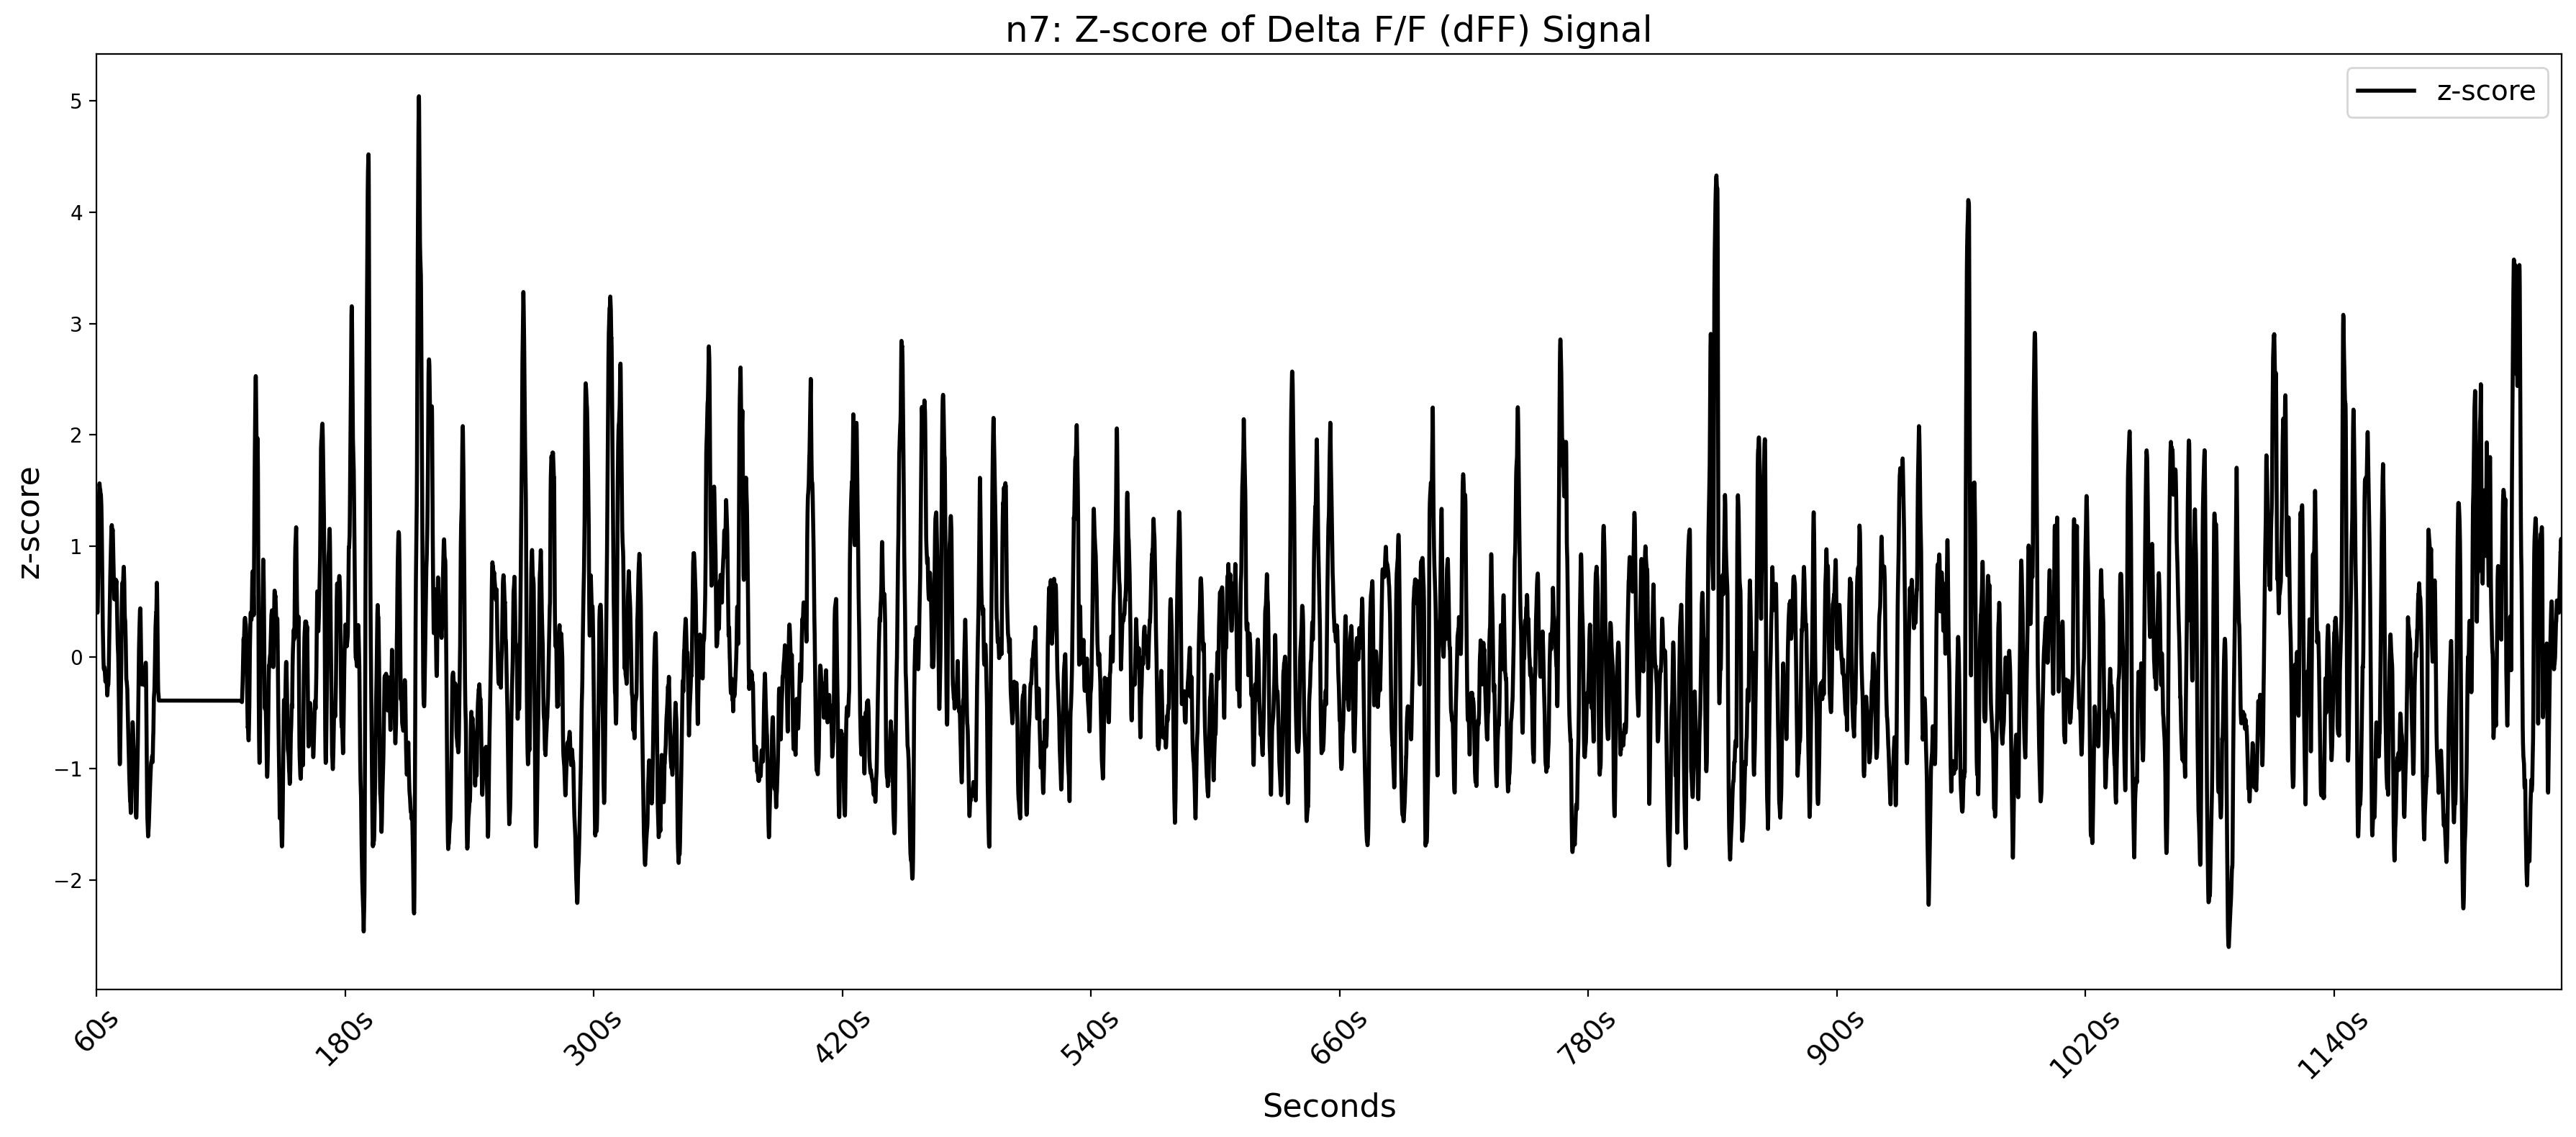

In [20]:
tdt_data_obj.plot_zscore()

Old method

In [21]:
# Downsample the data
# tdt_data_obj.downsample_data(N = 16)


# Compute dFF
tdt_data_obj.compute_dff()
tdt_data_obj.plot_signal('dFF')

AttributeError: 'TDTData' object has no attribute 'compute_dff'

In [16]:
tdt_data_obj.compute_zscore()

In [17]:
tdt_data_obj.print_behaviors()

No behaviors found.


## Mean DA during first of each behavior

In [18]:
tdt_data_obj.hab_dishab_extract_intruder_bouts(csv_base_path)


In [19]:
tdt_data_obj.s1_events

{'introduced': [184.5, 374.2, 558.9, 746.8, 936.9],
 'removed': [306.2, 492.1, 679.5, 867.3, 1059.8]}

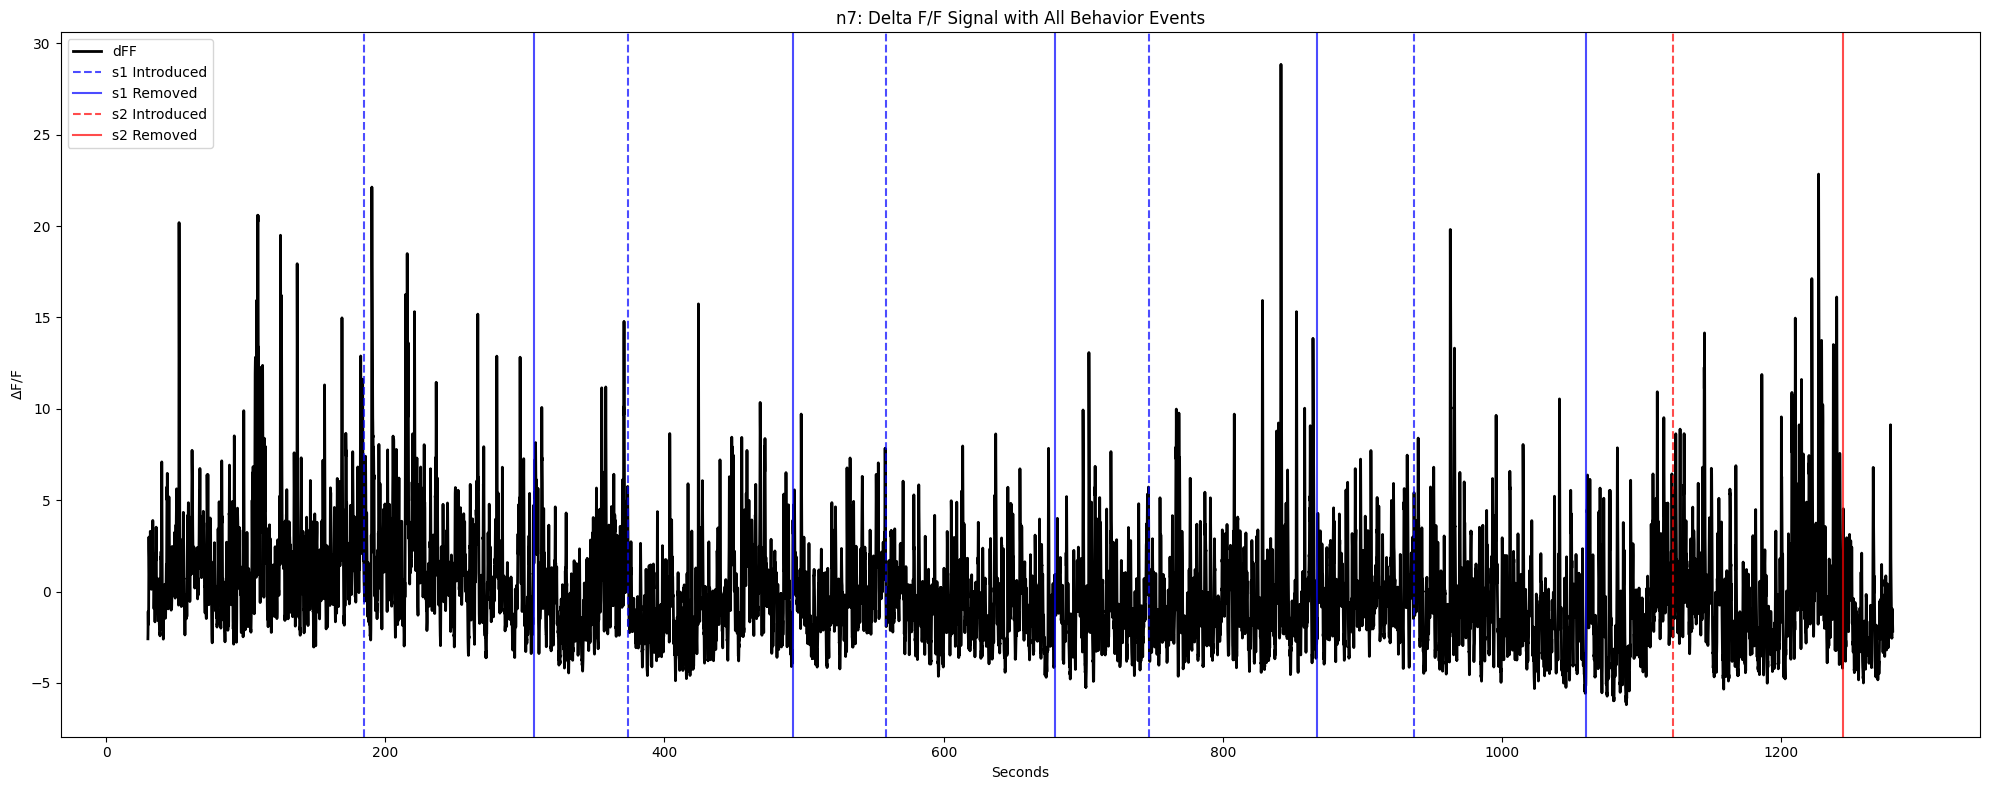

In [20]:
tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')

In [21]:
tdt_data_obj.smooth_signal()

AttributeError: 'TDTData' object has no attribute 'smooth_signal'

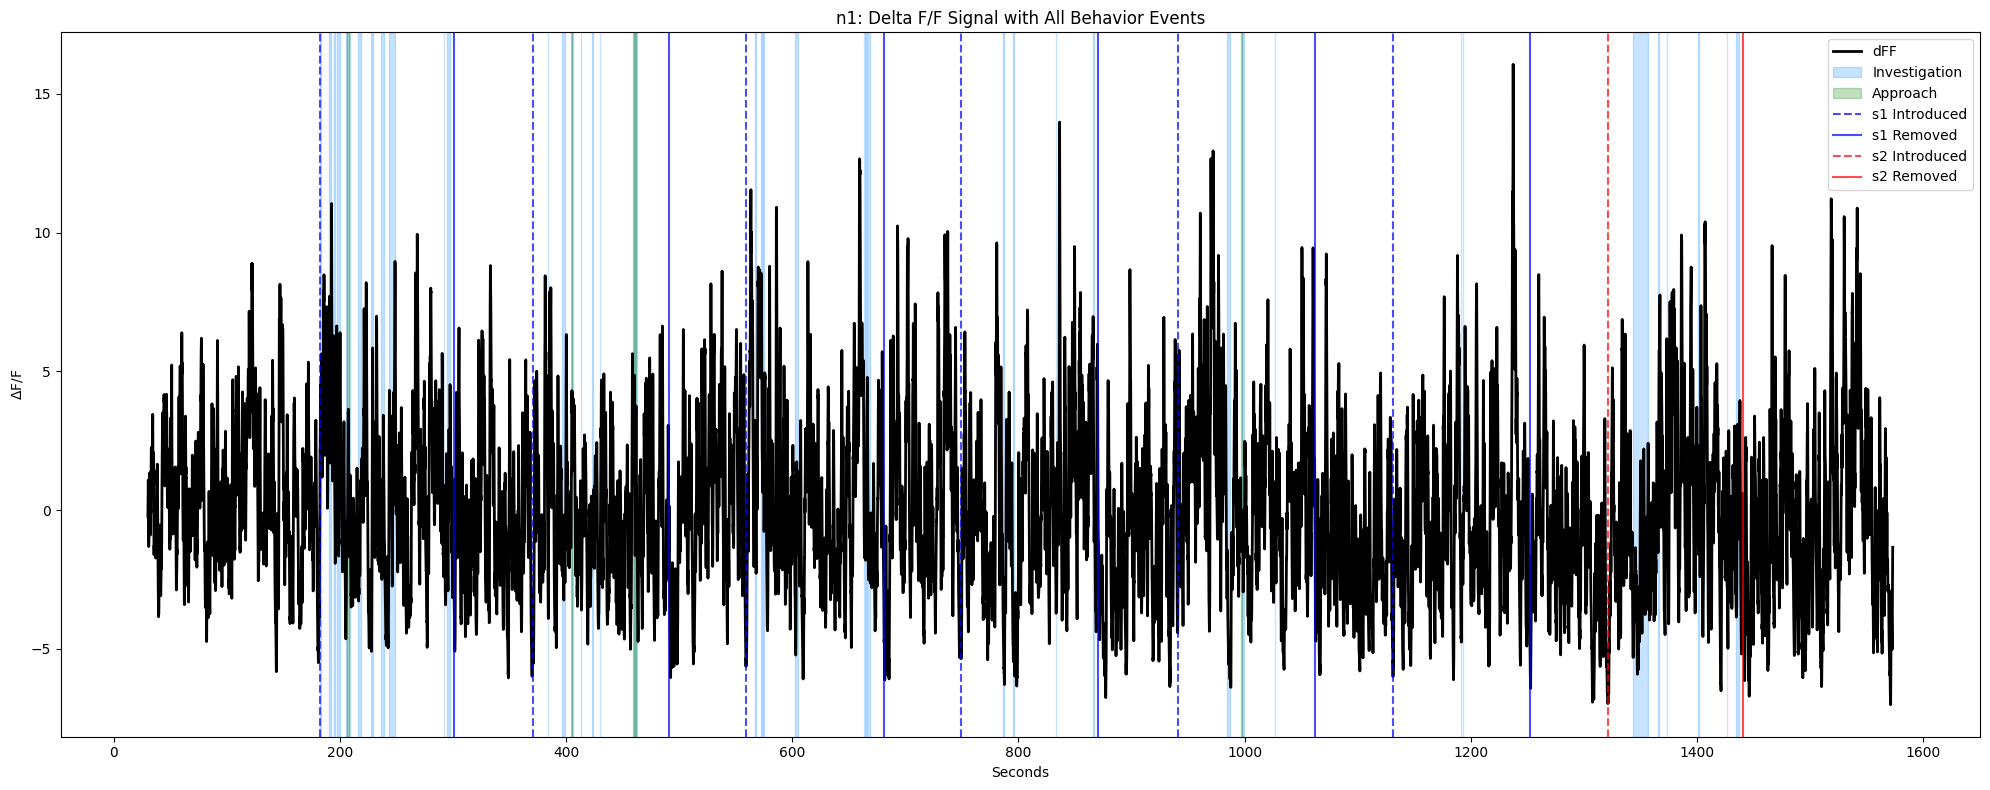

In [12]:
tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')

In [13]:
tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
# tdt_data_obj.hc_get_first_behavior()

In [14]:
tdt_data_obj.bout_dict

{'s1_1': {'Investigation': [{'Start Time': np.float64(182.0),
    'End Time': np.float64(183.067),
    'Total Duration': np.float64(1.0670000000000073),
    'Mean zscore': np.float64(0.9225239155678854)},
   {'Start Time': np.float64(190.6),
    'End Time': np.float64(191.533),
    'Total Duration': np.float64(0.9329999999999927),
    'Mean zscore': np.float64(1.4351966308329034)},
   {'Start Time': np.float64(194.867),
    'End Time': np.float64(195.467),
    'Total Duration': np.float64(0.6000000000000227),
    'Mean zscore': np.float64(0.415439996032171)},
   {'Start Time': np.float64(197.133),
    'End Time': np.float64(199.667),
    'Total Duration': np.float64(2.533999999999992),
    'Mean zscore': np.float64(0.5821046422513108)},
   {'Start Time': np.float64(204.933),
    'End Time': np.float64(205.933),
    'Total Duration': np.float64(1.0),
    'Mean zscore': np.float64(-0.963601149966928)},
   {'Start Time': np.float64(207.533),
    'End Time': np.float64(208.333),
    'Total